# 3. Быстрая гистограмма

Иногда хочется получить дискретное распределение из N колонок. Но пока что для этого у нас есть только plt.hist(), которая тратит много времени на отрисовку графика. Вам предлагается реализовать свою функцию построения дискретного распределения

1. Алгоритм должен получать на вход список чисел и количество колонок гистограммы. Возвращать нужно значения столбцов (ось абсцисс гистограммы) и количество значений, принадлежащее столбцу (ось ординат гистограммы). Пример с использованием plt показан ниже, сигнатура функции также показана ниже
1. Изучите функцию [plt.bar](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html). Это такая же гистограмма как plt.hist, но в отличие от hist требуется явно указывать высоту колонок и их название
1. С помощью результатов своего алгоритма и plt.bar постройте гистограмму по массиву из 50+ случайных чисел. Графики plt.bar по вашему алгоритму и plt.hist() должны совпадать, что подтвердит корректность работы вашего алгоритма
1. Сравните скорость построения распределения по массиву чисел с помощью своего алгоритма и с помощью plt.hist. В jupyter рекомендуется использовать built-in magic commands, а именно timeit. Но можно обойтись и ручными измерениями времени выполнения

Значения колонок: [3. 2. 2. 2.]
Названия колонок: [1.   1.75 2.5  3.25 4.  ]


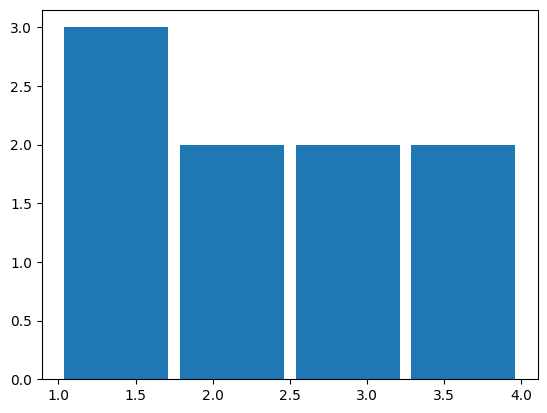

In [1]:
# Пример гистограммы с помощью plt.hist()
import matplotlib.pyplot as plt
import numpy as np

array = [1, 1, 2, 3, 4, 1, 2, 3, 4]

value_counts, bins_names, visual_figure = plt.hist(array,
                                                   bins=len(set(array)),
                                                   rwidth=0.9)
# Параметр rwidth и визуализацию в своей функции реализовывать не требуется
print('Значения колонок:', value_counts)
print('Названия колонок:', bins_names)

# Решение

In [2]:
from typing import List, Tuple, Union
import matplotlib.pyplot as plt
import numpy as np

def width_of(array: List[Union[int, float]],
          bins: int) -> float:
    return (array[-1] - array[0]) / bins


def fast_hist(array: List[Union[int, float]],
              bins: int) -> Tuple[List[int], List[float]]:
    """
    Builds bins' labels and bins' value counts for given array
    :param array: array with numeric values
    :param bins:  number of bins in result distribution
    :return: Two lists:
             first contains value counts of each bin,
             second contains list of bins' labels
    """
    array.sort()
    width = width_of(array, bins)
    heights = np.zeros(bins).astype(int)
    labels = np.array([array[0] + (j + 0.5) * width for j in range(bins)])
    i = 0
    for j in range(bins):
        while i < len(array) and array[i] <= array[0] + (j + 1) * width:
            heights[j] += 1
            i += 1
    return heights, labels


def show_fast_hist(array: List[Union[int, float]],
                   bins: int,
                   **kwargs):
    heights, labels = fast_hist(array, bins)
    plt.bar(labels, heights, (array[-1] - array[0]) / bins, **kwargs)


plt.fast_hist = show_fast_hist

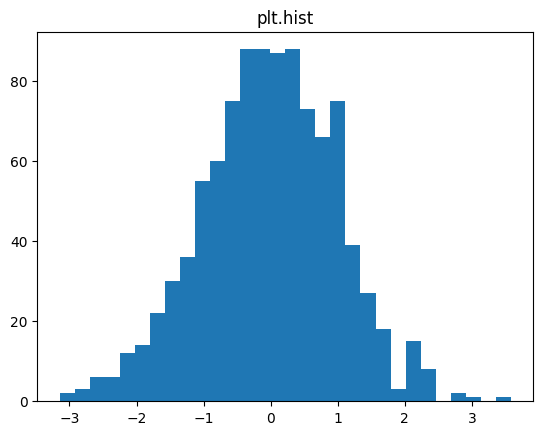

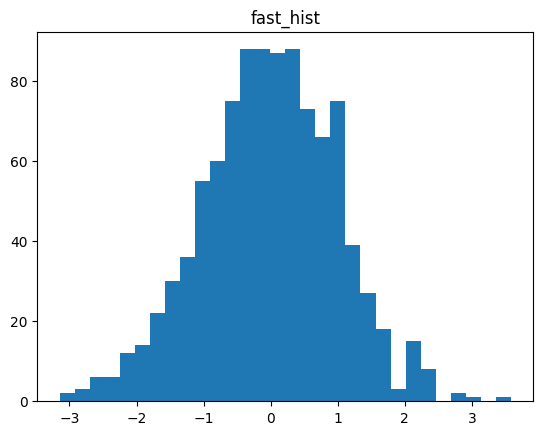

In [3]:
array = np.random.normal(size=1000)
plt.hist(array, bins=30)
plt.title('plt.hist')
plt.show()
plt.fast_hist(array, bins=30)
plt.title('fast_hist');

Сравним производительность методов.

In [4]:
%%timeit
fast_hist(array, bins=10)

642 µs ± 9.38 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


6.1 ms ± 312 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


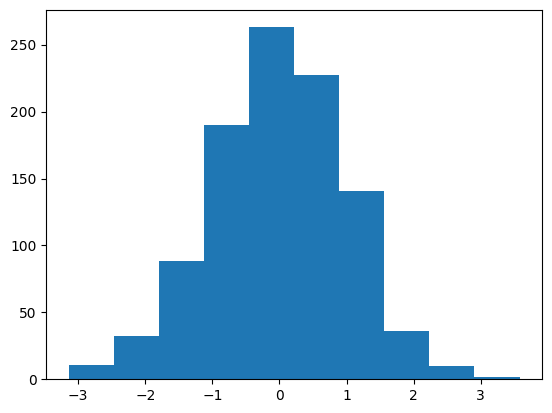

In [5]:
%%timeit
plt.hist(array, bins=10)

__Вывод__: `fast_hist` быстрее, чем `plt.hist` примерно в 9 раз.